In [1]:
import glob2
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import glob
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
def unnormalize(x):

    unx=(x+1)/2

    unx[unx>0.999]=1
    unx[unx<0.0001]=0

    #rescale to 0-1
    return unx


def re_scale(x,mxmn):

    #x: shape bX1X256X256
    #mxmn: maximum minimum values shape bX2

    mx=mxmn[:,0]
    mn=mxmn[:,1]

    mx=mx.reshape(-1,1,1,1)
    mn=mn.reshape(-1,1,1,1)

    mn[mn<0.0001]=0
    mx[mx<0.0001]=0

    x=x*(mx-mn)+mn

    return x

In [3]:
# file_list=[
#     ["./og_data_seed31/ddpm_500/run1/**.npy",
#     "./og_data_seed31/ddpm_500/run2/**.npy",
#     "./og_data_seed31/ddpm_500/run3/**.npy"],
#     ["./og_data_seed31/ddpm_250/run1/**.npy",
#     "./og_data_seed31/ddpm_250/run2/**.npy",
#     "./og_data_seed31/ddpm_250/run3/**.npy"],
#     ["./og_data_seed31/ddpm_100/run1/**.npy",
#     "./og_data_seed31/ddpm_100/run2/**.npy",
#     "./og_data_seed31/ddpm_100/run3/**.npy"],
#     ["./og_data_seed31/ddpm_50/run1/**.npy",
#     "./og_data_seed31/ddpm_50/run2/**.npy",
#     "./og_data_seed31/ddpm_50/run3/**.npy"],
# ]

file_list=[
    ["./preds_res/ddpm_500/run1/**.npy",
    "./preds_res/ddpm_500/run2/**.npy",
    "./preds_res/ddpm_500/run3/**.npy"],
    ["./preds_res/ddpm_250/run1/**.npy",
    "./preds_res/ddpm_250/run2/**.npy",
    "./preds_res/ddpm_250/run3/**.npy"],
    ["./preds_res/ddpm_100/run1/**.npy",
    "./preds_res/ddpm_100/run2/**.npy",
    "./preds_res/ddpm_100/run3/**.npy"],
    ["./preds_res/ddpm_50/run1/**.npy",
    "./preds_res/ddpm_50/run2/**.npy",
    "./preds_res/ddpm_50/run3/**.npy"],
]


# Create HDFs

In [4]:
for i in (range(len(file_list))):#sampling timesteps
    l=file_list[i]
    print(l)
    name=l[0].split("/")[-3]
    print(name)
    hhh=h5py.File("./preds_res/results_hyper_64_rr"+str(name)+"_runs.hdf5", "w")
    hhh.close()

    for j in (range(len(l))): #runs
        print(j)
        npys=glob2.glob(l[j])

        pred_s_list_runs=[]
        target_s_list_runs=[]

        for k in tqdm(npys):
            # print(k)
            data=np.load(k,allow_pickle=True)[()]
            # print(data.keys())

            pred=data["pred"]
            target=data["target"]
            scale=data["pred_min_max"]

            pred_un=unnormalize(pred)
            pred_scaled=re_scale(pred_un,scale)

            

            pred_s_list_runs.append(pred_scaled)
            target_s_list_runs.append(target)

        pred_s_list_runs=np.array(pred_s_list_runs)
        target_s_list_runs=np.array(target_s_list_runs)

        pred_s_list_runs_c=[]
        for g in pred_s_list_runs:
            for h in g:
                pred_s_list_runs_c.append(h)

        target_s_list_runs_c=[]
        for g in target_s_list_runs:
            for h in g:
                target_s_list_runs_c.append(h)

        with h5py.File("./preds_res/results_hyper_64_rr"+str(name)+"_runs.hdf5", "a") as f:
            f.create_dataset("pred_s_runs_"+str(j), data=pred_s_list_runs_c,compression="gzip",compression_opts=5)
            f.create_dataset("target_s_runs_"+str(j), data=target_s_list_runs_c,compression="gzip",compression_opts=5)
            f.close()
        
        with h5py.File("./preds_res/results_hyper_64_rr"+str(name)+"_runs.hdf5", "r") as f:
            print(f.keys())
            f.close()

print("Done")

['./preds_res/ddpm_500/run1/**.npy', './preds_res/ddpm_500/run2/**.npy', './preds_res/ddpm_500/run3/**.npy']
ddpm_500
0


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]
/tmp/ipykernel_108641/710582652.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pred_s_list_runs=np.array(pred_s_list_runs)
/tmp/ipykernel_108641/710582652.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target_s_list_runs=np.array(target_s_list_runs)


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
['./preds_res/ddpm_250/run1/**.npy', './preds_res/ddpm_250/run2/**.npy', './preds_res/ddpm_250/run3/**.npy']
ddpm_250
0


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
['./preds_res/ddpm_100/run1/**.npy', './preds_res/ddpm_100/run2/**.npy', './preds_res/ddpm_100/run3/**.npy']
ddpm_100
0


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
['./preds_res/ddpm_50/run1/**.npy', './preds_res/ddpm_50/run2/**.npy', './preds_res/ddpm_50/run3/**.npy']
ddpm_50
0


100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


100%|██████████| 10/10 [00:11<00:00,  1.10s/it]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
Done


# Get MAE & MSE

In [8]:
def MAE(a,b):
    return mean_absolute_error(a,b)

def MSE(a,b):
    return mean_squared_error(a,b)

In [9]:
list_hdf=glob2.glob("./preds_res/**hdf5")
print(list_hdf)
d_scaled={}

['./preds_res/results_hyper_64_ddpm_50_runs.hdf5', './preds_res/results_hyper_64_ddpm_100_runs.hdf5', './preds_res/results_hyper_64_ddpm_250_runs.hdf5', './preds_res/results_hyper_64_ddpm_500_runs.hdf5']


In [10]:
for i in list_hdf:

    with h5py.File(i, "r") as f:
        print(f.keys())
        time_step=i.split("/")[-1].split(".")[0].split("_")[-2]
        print(time_step)

        mae_l=[]
        mse_l=[]

        for j in range(3):

            pred=f["pred_s_runs_"+str(j)][:].squeeze()
            target=f["target_s_runs_"+str(j)][:].squeeze()

            pred_reshaped=pred.reshape(-1,64*64)
            target_reshaped=target.reshape(-1,64*64)
            # print(pred_reshaped.shape,target_reshaped.shape)

            mae=MAE(pred_reshaped,target_reshaped)
            mse=MSE(pred_reshaped,target_reshaped)

            mae_l.append(mae)
            mse_l.append(mse)
            print(mae,mse,)

        print("Mean MAE:",np.mean(mae_l),"STD mae",np.std(mae_l),"Mean MSE:",np.mean(mse_l),"STD mse",np.std(mse_l))

<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
50
1.4953446 271.12976
1.4916661 271.13333
1.4958053 271.41794
Mean MAE: 1.4942719 STD mae 0.0018522309 Mean MSE: 271.22702 STD mse 0.13501444
<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
100
1.5183436 271.51007
1.4937967 215.40825
1.5247257 271.25812
Mean MAE: 1.5122887 STD mae 0.013332836 Mean MSE: 252.72548 STD mse 26.387466
<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
250
1.5676844 271.74774
1.5634515 271.3968
1.5736117 271.77026
Mean MAE: 1.5682492 STD mae 0.0041670706 Mean MSE: 271.63828 STD mse 0.17099628
<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
500
1.5804219 216.01892
1.5771086 216.484
1.5879936 272.06494
Mean MAE: 1.58

In [21]:
d=h5py.File(list_hdf[-1], "r")
print(list_hdf[-1])
print(d.keys())

./preds_res/results_hyper_64_ddpm_500_runs.hdf5
<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>


In [22]:
pred=d["pred_s_runs_0"][:]
target=d["target_s_runs_0"][:]
print(pred.shape,target.shape)

(9950, 1, 64, 64) (9950, 1, 64, 64)


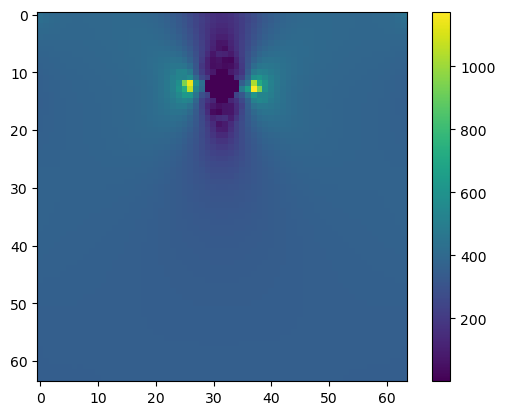

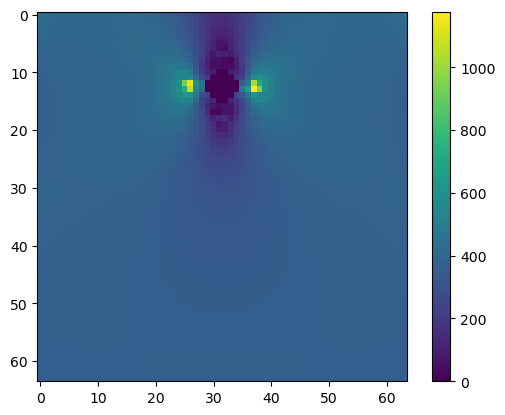

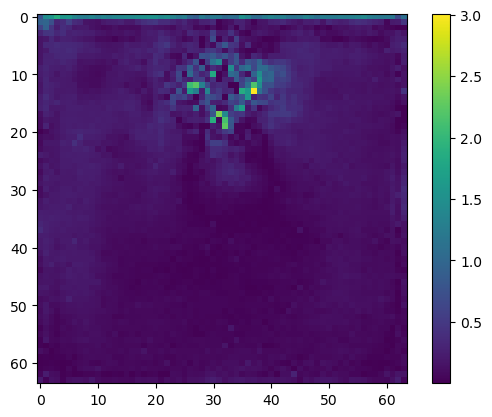

In [27]:
pred=pred.squeeze()
target=target.squeeze()

n=0

plt.imshow(pred[n])
plt.colorbar()
plt.show()

plt.imshow(target[n])
plt.colorbar()
plt.show()

plt.imshow(np.abs(pred[n]-target[n]))
plt.colorbar()
plt.show()

#print mae



In [11]:
d=np.load("./t0/ddpm_500/run1/batch_0.npy",allow_pickle=True)[()]

In [18]:
import numpy as np
d=np.load("../../stress_diffuser_256/analysis_256/mae_scaled_256x256.npy",allow_pickle=True)[()]
print(d.keys())

dict_keys([500, 100, 250, 50])


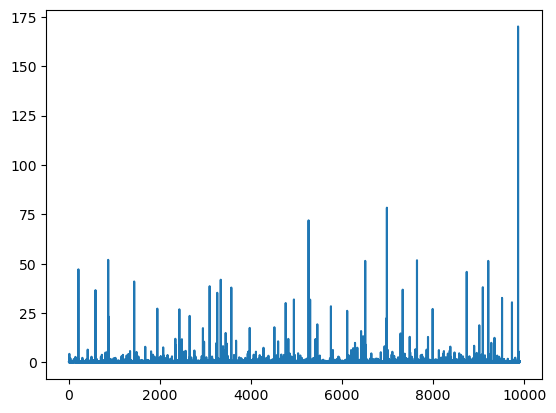

In [37]:
plt.plot(d[500]["mae_mean"])

# outa distribution

In [2]:
import glob2
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import glob
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
def unnormalize(x):

    unx=(x+1)/2

    unx[unx>0.999]=1
    unx[unx<0.0001]=0

    #rescale to 0-1
    return unx


def re_scale(x,mxmn):

    #x: shape bX1X256X256
    #mxmn: maximum minimum values shape bX2

    mx=mxmn[:,0]
    mn=mxmn[:,1]

    mx=mx.reshape(-1,1,1,1)
    mn=mn.reshape(-1,1,1,1)

    mn[mn<0.0001]=0
    mx[mx<0.0001]=0

    x=x*(mx-mn)+mn

    return x

In [4]:
# file_list=[
#     ["./og_data_seed31/ddpm_500/run1/**.npy",
#     "./og_data_seed31/ddpm_500/run2/**.npy",
#     "./og_data_seed31/ddpm_500/run3/**.npy"],
#     ["./og_data_seed31/ddpm_250/run1/**.npy",
#     "./og_data_seed31/ddpm_250/run2/**.npy",
#     "./og_data_seed31/ddpm_250/run3/**.npy"],
#     ["./og_data_seed31/ddpm_100/run1/**.npy",
#     "./og_data_seed31/ddpm_100/run2/**.npy",
#     "./og_data_seed31/ddpm_100/run3/**.npy"],
#     ["./og_data_seed31/ddpm_50/run1/**.npy",
#     "./og_data_seed31/ddpm_50/run2/**.npy",
#     "./og_data_seed31/ddpm_50/run3/**.npy"],
# ]

file_list=[
    ["./preds_res_outa/ddpm_500/run1/**.npy",
    "./preds_res_outa/ddpm_500/run2/**.npy",
    "./preds_res_outa/ddpm_500/run3/**.npy"],
    ["./preds_res_outa/ddpm_250/run1/**.npy",
    "./preds_res_outa/ddpm_250/run2/**.npy",
    "./preds_res_outa/ddpm_250/run3/**.npy"],
    ["./preds_res_outa/ddpm_100/run1/**.npy",
    "./preds_res_outa/ddpm_100/run2/**.npy",
    "./preds_res_outa/ddpm_100/run3/**.npy"],
    ["./preds_res_outa/ddpm_50/run1/**.npy",
    "./preds_res_outa/ddpm_50/run2/**.npy",
    "./preds_res_outa/ddpm_50/run3/**.npy"],
]


In [6]:
for i in (range(len(file_list))):#sampling timesteps
    l=file_list[i]
    print(l)
    name=l[0].split("/")[-3]
    print(name)
    hhh=h5py.File("./preds_res_outa/un_norm/results_hyper_64_unnorm_"+str(name)+"_runs.hdf5", "w")
    hhh.close()

    for j in (range(len(l))): #runs
        print(j)
        npys=glob2.glob(l[j])

        pred_s_list_runs=[]
        target_s_list_runs=[]

        for k in tqdm(npys):
            # print(k)
            data=np.load(k,allow_pickle=True)[()]
            print(data.keys())

            pred=data["pred"]
            target=data["target"]
            target_n=data["target_n"]
            scale=data["pred_min_max"]

            pred_un=unnormalize(pred)
            pred_scaled=re_scale(pred_un,scale)

            

            # pred_s_list_runs.append(pred_scaled)
            # target_s_list_runs.append(target)
            pred_s_list_runs.append(pred)
            target_s_list_runs.append(target_n)

        pred_s_list_runs=np.array(pred_s_list_runs)
        target_s_list_runs=np.array(target_s_list_runs)

        pred_s_list_runs_c=[]
        for g in pred_s_list_runs:
            for h in g:
                pred_s_list_runs_c.append(h)

        target_s_list_runs_c=[]
        for g in target_s_list_runs:
            for h in g:
                target_s_list_runs_c.append(h)

        with h5py.File("./preds_res_outa/un_norm/results_hyper_64_unnorm_"+str(name)+"_runs.hdf5", "a") as f:
            f.create_dataset("pred_s_runs_"+str(j), data=pred_s_list_runs_c,compression="gzip",compression_opts=5)
            f.create_dataset("target_s_runs_"+str(j), data=target_s_list_runs_c,compression="gzip",compression_opts=5)
            f.close()
        
        with h5py.File("./preds_res_outa/un_norm/results_hyper_64_unnorm_"+str(name)+"_runs.hdf5", "r") as f:
            print(f.keys())
            f.close()

print("Done")

['./preds_res_outa/ddpm_500/run1/**.npy', './preds_res_outa/ddpm_500/run2/**.npy', './preds_res_outa/ddpm_500/run3/**.npy']
ddpm_500
0


  0%|          | 0/11 [00:00<?, ?it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:00<00:03,  2.59it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:01<00:03,  2.10it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:01<00:03,  1.95it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:02<00:03,  1.86it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:03<00:02,  1.79it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])
dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:03<00:01,  2.28it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])
dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])
dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])



/tmp/ipykernel_97030/2784428897.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pred_s_list_runs=np.array(pred_s_list_runs)
/tmp/ipykernel_97030/2784428897.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target_s_list_runs=np.array(target_s_list_runs)


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


  9%|▉         | 1/11 [00:00<00:06,  1.66it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:05,  1.65it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:02<00:05,  1.43it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:02<00:04,  1.52it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:03<00:03,  1.58it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:03<00:03,  1.59it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:04<00:02,  1.61it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:04<00:01,  1.73it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:05<00:01,  1.54it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:06<00:00,  1.47it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:06<00:00,  1.58it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


  9%|▉         | 1/11 [00:00<00:07,  1.32it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:07,  1.21it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:02<00:06,  1.23it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:03<00:05,  1.25it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:04<00:04,  1.20it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:04<00:04,  1.19it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:05<00:03,  1.15it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:06<00:02,  1.20it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:07<00:01,  1.23it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:08<00:00,  1.23it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:08<00:00,  1.23it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
['./preds_res_outa/ddpm_250/run1/**.npy', './preds_res_outa/ddpm_250/run2/**.npy', './preds_res_outa/ddpm_250/run3/**.npy']
ddpm_250
0


  9%|▉         | 1/11 [00:00<00:08,  1.22it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:06,  1.29it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:02<00:05,  1.35it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:03<00:05,  1.33it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:03<00:04,  1.34it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:04<00:03,  1.32it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:05<00:03,  1.29it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:06<00:03,  1.02s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:09<00:02,  1.45s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:11<00:01,  1.63s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:12<00:00,  1.10s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


  9%|▉         | 1/11 [00:00<00:06,  1.50it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:06,  1.44it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:02<00:06,  1.29it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:02<00:05,  1.33it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:03<00:04,  1.36it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:04<00:03,  1.37it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:05<00:02,  1.34it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:05<00:02,  1.40it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:06<00:01,  1.45it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:07<00:00,  1.46it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:07<00:00,  1.43it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


  9%|▉         | 1/11 [00:01<00:19,  1.92s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:03<00:16,  1.88s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:04<00:11,  1.44s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:05<00:08,  1.19s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:06<00:06,  1.05s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:07<00:04,  1.02it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:07<00:03,  1.07it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:08<00:02,  1.08it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:09<00:01,  1.03it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:10<00:00,  1.03it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:11<00:00,  1.07s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
['./preds_res_outa/ddpm_100/run1/**.npy', './preds_res_outa/ddpm_100/run2/**.npy', './preds_res_outa/ddpm_100/run3/**.npy']
ddpm_100
0


  9%|▉         | 1/11 [00:00<00:06,  1.46it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:06,  1.47it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:01<00:05,  1.53it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:02<00:04,  1.48it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:03<00:04,  1.44it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:04<00:03,  1.44it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:04<00:02,  1.44it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:05<00:02,  1.42it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:06<00:01,  1.46it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:06<00:00,  1.48it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


  9%|▉         | 1/11 [00:00<00:05,  1.74it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:05,  1.70it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:01<00:04,  1.67it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:02<00:04,  1.65it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:03<00:03,  1.63it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:03<00:03,  1.63it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:04<00:02,  1.63it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:04<00:01,  1.62it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:05<00:01,  1.61it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:06<00:00,  1.63it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


  9%|▉         | 1/11 [00:00<00:05,  1.72it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:05,  1.67it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:01<00:04,  1.61it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:02<00:04,  1.64it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:03<00:03,  1.66it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:05<00:05,  1.10s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:07<00:05,  1.43s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:08<00:04,  1.53s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:11<00:03,  1.82s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:12<00:01,  1.50s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:12<00:00,  1.16s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
['./preds_res_outa/ddpm_50/run1/**.npy', './preds_res_outa/ddpm_50/run2/**.npy', './preds_res_outa/ddpm_50/run3/**.npy']
ddpm_50
0


  9%|▉         | 1/11 [00:00<00:08,  1.15it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:07,  1.18it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:02<00:06,  1.17it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:03<00:06,  1.16it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:04<00:04,  1.20it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:05<00:04,  1.22it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:05<00:03,  1.23it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:06<00:02,  1.20it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:07<00:01,  1.19it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:08<00:00,  1.18it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:09<00:00,  1.21it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'target_s_runs_0']>
1


  9%|▉         | 1/11 [00:01<00:17,  1.76s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:02<00:12,  1.36s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:03<00:08,  1.11s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:04<00:08,  1.18s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:05<00:06,  1.07s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:06<00:05,  1.02s/it]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:07<00:03,  1.03it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:08<00:02,  1.08it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:09<00:01,  1.10it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:10<00:00,  1.11it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:10<00:00,  1.00it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'target_s_runs_0', 'target_s_runs_1']>
2


  9%|▉         | 1/11 [00:00<00:07,  1.31it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 18%|█▊        | 2/11 [00:01<00:06,  1.30it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 27%|██▋       | 3/11 [00:02<00:06,  1.31it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 36%|███▋      | 4/11 [00:03<00:05,  1.30it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 45%|████▌     | 5/11 [00:04<00:05,  1.17it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 55%|█████▍    | 6/11 [00:04<00:04,  1.16it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 64%|██████▎   | 7/11 [00:05<00:03,  1.20it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 73%|███████▎  | 8/11 [00:06<00:02,  1.05it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 82%|████████▏ | 9/11 [00:07<00:01,  1.12it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


 91%|█████████ | 10/11 [00:08<00:00,  1.16it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


100%|██████████| 11/11 [00:09<00:00,  1.20it/s]

dict_keys(['inps', 'target', 'target_n', 'stack', 'pred', 'pred_min_max'])


<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
Done
